In [279]:
import cmocean.cm as cm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.integrate import simps

## define functions

In [280]:
def lin_fit(m, x, b):
    return m*x + b

In [281]:
def make_results_model(fall_file, winter_file, spring_file, summer_file):
    results_fall = pd.read_csv(fall_file)
    results_fall['season'] = 'fall'
    results_winter = pd.read_csv(winter_file)
    results_winter['season'] = 'winter'
    results_spring = pd.read_csv(spring_file)
    results_spring['season'] = 'spring'
    results_summer = pd.read_csv(summer_file)
    results_summer['season'] = 'summer'

    results_all = pd.concat([results_fall, results_winter, results_spring, results_summer], ignore_index=True)
    results_all = results_all.rename(columns={'Unnamed: 0': 'model'})
    results_201905R = results_all[results_all['model'] == '201905R']
    results_202111 = results_all[results_all['model'] == '202111']
    return results_201905R, results_202111

In [282]:
def bar_chart_old(results_201905R, results_202111, categories, prod_region):
    results_201905R_r = results_201905R[results_201905R['region'] == prod_region]
    results_202111_r = results_202111[results_202111['region'] == prod_region]

    fig, ax = plt.subplots(2, 4, figsize=(15, 6), sharex='col', sharey='col', gridspec_kw={'width_ratios': [5, 1, 1, 1]})
    fig.suptitle('{} region metric by season'.format(prod_region))

    bar_width = 0.2
    x = np.arange(len(categories))

    ## rmse, crmse, systematic, nonsystematic
    ax[0,0].set_title('model v201905R')
    ax[0,0].grid(axis='y', zorder=0)
    ax[0,0].bar(x - 1.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'winter'][categories].values[0], label='winter', width=bar_width, edgecolor='k', color=color_winter, zorder=2)
    ax[0,0].bar(x - 0.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'spring'][categories].values[0], label='spring', width=bar_width, edgecolor='k', color=color_spring, zorder=2)
    ax[0,0].bar(x + 0.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'summer'][categories].values[0], label='summer', width=bar_width, edgecolor='k', color=color_summer, zorder=2)
    ax[0,0].bar(x + 1.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'fall'][categories].values[0], label='fall', width=bar_width, edgecolor='k', color=color_fall, zorder=2)
    ax[0,0].set_xticks(x, categories)
    ax[0,0].legend(ncols=4, loc='center', bbox_to_anchor=(0.5, 0.92))
    ax[0,0].set_ylim([0, 1.2*np.array([np.array(results_201905R_r[categories]).max(), np.array(results_202111_r[categories]).max()]).max()])

    ax[1,0].set_title('model v202111')
    ax[1,0].grid(axis='y', zorder=0)
    ax[1,0].bar(x - 1.5 * bar_width, results_202111_r[results_202111_r['season'] == 'winter'][categories].values[0], label='winter', width=bar_width, edgecolor='k', color=color_winter, zorder=2)
    ax[1,0].bar(x - 0.5 * bar_width, results_202111_r[results_202111_r['season'] == 'spring'][categories].values[0], label='spring', width=bar_width, edgecolor='k', color=color_spring, zorder=2)
    ax[1,0].bar(x + 0.5 * bar_width, results_202111_r[results_202111_r['season'] == 'summer'][categories].values[0], label='summer', width=bar_width, edgecolor='k', color=color_summer, zorder=2)
    ax[1,0].bar(x + 1.5 * bar_width, results_202111_r[results_202111_r['season'] == 'fall'][categories].values[0], label='fall', width=bar_width, edgecolor='k', color=color_fall, zorder=2)
    ax[1,0].legend(ncols=4, loc='center', bbox_to_anchor=(0.5, 0.92))

    bar_width=0.10
    ## swillmott
    x = np.array([0])

    ax[0,1].grid(axis='y', zorder=0)
    ax[0,1].bar(x - 1.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'winter'][['swillmott']].values[0], label='winter', width=bar_width, edgecolor='k', color=color_winter, zorder=2)
    ax[0,1].bar(x - 0.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'spring'][['swillmott']].values[0], label='spring', width=bar_width, edgecolor='k', color=color_spring, zorder=2)
    ax[0,1].bar(x + 0.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'summer'][['swillmott']].values[0], label='summer', width=bar_width, edgecolor='k', color=color_summer, zorder=2)
    ax[0,1].bar(x + 1.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'fall'][['swillmott']].values[0], label='fall', width=bar_width, edgecolor='k', color=color_fall, zorder=2)
    ax[0,1].set_xticks(x, ['swillmott'])

    ax[1,1].grid(axis='y', zorder=0)
    ax[1,1].bar(x - 1.5 * bar_width, results_202111_r[results_202111_r['season'] == 'winter']['swillmott'].values[0], label='winter', width=bar_width, edgecolor='k', color=color_winter, zorder=2)
    ax[1,1].bar(x - 0.5 * bar_width, results_202111_r[results_202111_r['season'] == 'spring']['swillmott'].values[0], label='spring', width=bar_width, edgecolor='k', color=color_spring, zorder=2)
    ax[1,1].bar(x + 0.5 * bar_width, results_202111_r[results_202111_r['season'] == 'summer']['swillmott'].values[0], label='summer', width=bar_width, edgecolor='k', color=color_summer, zorder=2)
    ax[1,1].bar(x + 1.5 * bar_width, results_202111_r[results_202111_r['season'] == 'fall']['swillmott'].values[0], label='fall', width=bar_width, edgecolor='k', color=color_fall, zorder=2)

    ## spread
    x = np.array([0])

    ax[0,2].grid(axis='y', zorder=0)
    ax[0,2].bar(x - 1.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'winter'][['spread']].values[0], label='winter', width=bar_width, edgecolor='k', color=color_winter, zorder=2)
    ax[0,2].bar(x - 0.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'spring'][['spread']].values[0], label='spring', width=bar_width, edgecolor='k', color=color_spring, zorder=2)
    ax[0,2].bar(x + 0.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'summer'][['spread']].values[0], label='summer', width=bar_width, edgecolor='k', color=color_summer, zorder=2)
    ax[0,2].bar(x + 1.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'fall'][['spread']].values[0], label='fall', width=bar_width, edgecolor='k', color=color_fall, zorder=2)
    ax[0,2].set_xticks(x, ['spread'])

    ax[1,2].grid(axis='y', zorder=0)
    ax[1,2].bar(x - 1.5 * bar_width, results_202111_r[results_202111_r['season'] == 'winter']['spread'].values[0], label='winter', width=bar_width, edgecolor='k', color=color_winter, zorder=2)
    ax[1,2].bar(x - 0.5 * bar_width, results_202111_r[results_202111_r['season'] == 'spring']['spread'].values[0], label='spring', width=bar_width, edgecolor='k', color=color_spring, zorder=2)
    ax[1,2].bar(x + 0.5 * bar_width, results_202111_r[results_202111_r['season'] == 'summer']['spread'].values[0], label='summer', width=bar_width, edgecolor='k', color=color_summer, zorder=2)
    ax[1,2].bar(x + 1.5 * bar_width, results_202111_r[results_202111_r['season'] == 'fall']['spread'].values[0], label='fall', width=bar_width, edgecolor='k', color=color_fall, zorder=2)

    ## bias
    x = np.array([0])

    ax[0,3].grid(axis='y', zorder=0)
    ax[0,3].bar(x - 1.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'winter'][['bias']].values[0], label='winter', width=bar_width, edgecolor='k', color=color_winter, zorder=2)
    ax[0,3].bar(x - 0.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'spring'][['bias']].values[0], label='spring', width=bar_width, edgecolor='k', color=color_spring, zorder=2)
    ax[0,3].bar(x + 0.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'summer'][['bias']].values[0], label='summer', width=bar_width, edgecolor='k', color=color_summer, zorder=2)
    ax[0,3].bar(x + 1.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'fall'][['bias']].values[0], label='fall', width=bar_width, edgecolor='k', color=color_fall, zorder=2)
    ax[0,3].set_xticks(x, ['bias'])

    ax[1,3].grid(axis='y', zorder=0)
    ax[1,3].bar(x - 1.5 * bar_width, results_202111_r[results_202111_r['season'] == 'winter']['bias'].values[0], label='winter', width=bar_width, edgecolor='k', color=color_winter, zorder=2)
    ax[1,3].bar(x - 0.5 * bar_width, results_202111_r[results_202111_r['season'] == 'spring']['bias'].values[0], label='spring', width=bar_width, edgecolor='k', color=color_spring, zorder=2)
    ax[1,3].bar(x + 0.5 * bar_width, results_202111_r[results_202111_r['season'] == 'summer']['bias'].values[0], label='summer', width=bar_width, edgecolor='k', color=color_summer, zorder=2)
    ax[1,3].bar(x + 1.5 * bar_width, results_202111_r[results_202111_r['season'] == 'fall']['bias'].values[0], label='fall', width=bar_width, edgecolor='k', color=color_fall, zorder=2)

In [283]:
def single_bar_chart(results_201905R, results_202111, categories, prod_region, metric, units):
    results_201905R_r = results_201905R[results_201905R['region'] == prod_region]
    results_202111_r = results_202111[results_202111['region'] == prod_region]

    fig, ax = plt.subplots(2, 1, figsize=(1.5, 6), sharex='col', sharey='col')
    # fig.suptitle('{} region metric by season'.format(prod_region))

    bar_width = 0.2
    x = np.array([0])

    ## rmse, crmse, systematic, nonsystematic
    ax[0].set_title('old model')
    ax[0].grid(axis='y', zorder=0)
    ax[0].bar(x - 1.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'winter'][metric].values[0], label='winter', width=bar_width, edgecolor='k', color=color_winter, zorder=2)
    ax[0].bar(x - 0.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'spring'][metric].values[0], label='spring', width=bar_width, edgecolor='k', color=color_spring, zorder=2)
    ax[0].bar(x + 0.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'summer'][metric].values[0], label='summer', width=bar_width, edgecolor='k', color=color_summer, zorder=2)
    ax[0].bar(x + 1.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'fall'][metric].values[0], label='fall', width=bar_width, edgecolor='k', color=color_fall, zorder=2)
    ax[0].set_xticks(x, [metric])
    # ax[0].legend(ncols=1, loc='center left', bbox_to_anchor=(1, 0.5))
    ax[0].set_ylim([np.array(1.2*np.array([np.array(results_201905R_r[metric]).min(), np.array(results_202111_r[metric]).min()]).min()), 1.2*np.array([np.array(results_201905R_r[metric]).max(), np.array(results_202111_r[metric]).max()]).max()])
    # ax[0].set_ylim([0, 1.2*np.array([np.array(results_201905R_r[metric]).max(), np.array(results_202111_r[metric]).max()]).max()])
    ax[0].set_ylabel(units)

    ax[1].set_title('new model')
    ax[1].grid(axis='y', zorder=0)
    ax[1].bar(x - 1.5 * bar_width, results_202111_r[results_202111_r['season'] == 'winter'][metric].values[0], label='winter', width=bar_width, edgecolor='k', color=color_winter, zorder=2)
    ax[1].bar(x - 0.5 * bar_width, results_202111_r[results_202111_r['season'] == 'spring'][metric].values[0], label='spring', width=bar_width, edgecolor='k', color=color_spring, zorder=2)
    ax[1].bar(x + 0.5 * bar_width, results_202111_r[results_202111_r['season'] == 'summer'][metric].values[0], label='summer', width=bar_width, edgecolor='k', color=color_summer, zorder=2)
    ax[1].bar(x + 1.5 * bar_width, results_202111_r[results_202111_r['season'] == 'fall'][metric].values[0], label='fall', width=bar_width, edgecolor='k', color=color_fall, zorder=2)
    # ax[1].legend(ncols=1, loc='center left', bbox_to_anchor=(1, 0.5))
    ax[1].set_ylabel(units)


In [284]:
def regressions_and_ts(results_201905R, results_202111, prod_region):
    x_sal = np.linspace(0,35,100)
    ideal_y = lin_fit(m=1, x=x_sal, b=1)

    results_201905R_r = results_201905R[results_201905R['region'] == prod_region]
    results_202111_r = results_202111[results_202111['region'] == prod_region]

    # fig, ax = plt.subplots(2, 2, figsize=(12, 8), sharex='col', sharey=False, gridspec_kw={'width_ratios': [1, 2]})
    fig, ax = plt.subplots(2, 2, figsize=(15, 6), sharex='col', sharey=False, gridspec_kw={'width_ratios': [1, 3.25]})

    fig.suptitle('{} region obs-model regressions and river timeseries'.format(prod_region))

    ## lines of fit
    ax[0,0].set_aspect('equal')
    ax[0,0].plot(x_sal, ideal_y, color='black', alpha=0.5)
    ax[0,0].set_ylim([0,35])
    ax[0,0].set_xlim([0,35])
    ax[0,0].plot(x_sal, lin_fit(x=x_sal, m=1-results_201905R_r[results_201905R_r['season'] == 'winter'][['slopedev']].values[0], b=results_201905R_r[results_201905R_r['season'] == 'winter'][['const']].values[0]), linestyle=line_winter, color=color_winter, label='winter', linewidth=2)
    ax[0,0].plot(x_sal, lin_fit(x=x_sal, m=1-results_201905R_r[results_201905R_r['season'] == 'spring'][['slopedev']].values[0], b=results_201905R_r[results_201905R_r['season'] == 'spring'][['const']].values[0]), linestyle=line_spring, color=color_spring, label='spring', linewidth=2)
    ax[0,0].plot(x_sal, lin_fit(x=x_sal, m=1-results_201905R_r[results_201905R_r['season'] == 'summer'][['slopedev']].values[0], b=results_201905R_r[results_201905R_r['season'] == 'summer'][['const']].values[0]), linestyle=line_summer, color=color_summer, label='summer', linewidth=2)
    ax[0,0].plot(x_sal, lin_fit(x=x_sal, m=1-results_201905R_r[results_201905R_r['season'] == 'fall'][['slopedev']].values[0], b=results_201905R_r[results_201905R_r['season'] == 'fall'][['const']].values[0]), linestyle=line_fall, color=color_fall, label='fall', linewidth=2)
    ax[0,0].legend(loc='upper left', facecolor='white')
    ax[0,0].set_title('model v201905R')
    ax[0,0].set_ylabel('model')

    ax[1,0].set_aspect('equal')
    ax[1,0].plot(x_sal, ideal_y, color='black', alpha=0.5)
    ax[1,0].set_ylim([0,35])
    ax[1,0].set_xlim([0,35])
    ax[1,0].plot(x_sal, lin_fit(x=x_sal, m=1-results_202111_r[results_202111_r['season'] == 'winter'][['slopedev']].values[0], b=results_202111_r[results_202111_r['season'] == 'winter'][['const']].values[0]), linestyle=line_winter, color=color_winter, label='winter', linewidth=2)
    ax[1,0].plot(x_sal, lin_fit(x=x_sal, m=1-results_202111_r[results_202111_r['season'] == 'spring'][['slopedev']].values[0], b=results_202111_r[results_202111_r['season'] == 'spring'][['const']].values[0]), linestyle=line_spring, color=color_spring, label='spring', linewidth=2)
    ax[1,0].plot(x_sal, lin_fit(x=x_sal, m=1-results_202111_r[results_202111_r['season'] == 'summer'][['slopedev']].values[0], b=results_202111_r[results_202111_r['season'] == 'summer'][['const']].values[0]), linestyle=line_summer, color=color_summer, label='summer', linewidth=2)
    ax[1,0].plot(x_sal, lin_fit(x=x_sal, m=1-results_202111_r[results_202111_r['season'] == 'fall'][['slopedev']].values[0], b=results_202111_r[results_202111_r['season'] == 'fall'][['const']].values[0]), linestyle=line_fall, color=color_fall, label='fall', linewidth=2)
    ax[1,0].set_title('model v202111')
    ax[1,0].set_xlabel('obs')
    ax[1,0].set_ylabel('model')

 
    ## timeseries
    conv_fact = 440*500/1026
    max_flow = conv_fact*np.array([daily_clim_202108[river_dict[prod_region]].max(), daily_clim_201702[river_dict[prod_region]].max()]).max()
    rect_winter1 = patches.Rectangle((daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin([1, 2])].min(),0), daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin([1, 2])].max(), max_flow, facecolor=color_winter, edgecolor=color_winter, alpha=0.2, zorder=0)
    rect_winter2 = patches.Rectangle((daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin([12])].min(),0), daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin([12])].max()-daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin([12])].min(), max_flow, facecolor=color_winter, edgecolor=color_winter, alpha=0.2, zorder=0)
    rect_spring = patches.Rectangle((daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['spring'])].min(),0), daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['spring'])].max()-daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['spring'])].min()+1, max_flow, facecolor=color_spring, edgecolor=color_spring, alpha=0.2, zorder=0)
    rect_summer = patches.Rectangle((daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['summer'])].min(),0), daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['summer'])].max()-daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['summer'])].min()+2, max_flow, facecolor=color_summer, edgecolor=color_summer, alpha=0.2, zorder=0)
    rect_fall = patches.Rectangle((daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['fall'])].min(),0), daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['fall'])].max()-daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['fall'])].min()+1, max_flow, facecolor=color_fall, edgecolor=color_fall, alpha=0.2, zorder=0)


    ax[0,1].add_patch(rect_winter1)
    ax[0,1].add_patch(rect_winter2)
    ax[0,1].add_patch(rect_spring)
    ax[0,1].add_patch(rect_summer)
    ax[0,1].add_patch(rect_fall)
    # ax[0,1].plot(daily_clim_201702['dayofyear'], daily_clim_201702[river_dict[prod_region]], color=color1, linewidth=2, zorder=3, label='rivers v201702')
    # ax[0,1].plot(daily_clim_202108['dayofyear'], daily_clim_202108[river_dict[prod_region]], color=color2, linewidth=2, zorder=3, label='rivers v202108')
    ax[0,1].plot(daily_clim_201702['dayofyear'], conv_fact*daily_clim_201702[river_dict[prod_region]], color=color1, linewidth=2, zorder=3, label='old model')
    ax[0,1].plot(daily_clim_202108['dayofyear'], conv_fact*daily_clim_202108[river_dict[prod_region]], color=color2, linewidth=2, zorder=3, label='new model')
    ax[0,1].legend()
    ax[0,1].set_title('river forcing timeseries for previous and current model versions')
    ax[0,1].set_ylabel(r'flow [$m^3/s$]')

    diff = conv_fact * (daily_clim_202108[river_dict[prod_region]]-daily_clim_201702[river_dict[prod_region]])
    max_flow = diff.max()
    min_flow = diff.min()
    rect_winter1 = patches.Rectangle((daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin([1, 2])].min(), min_flow), daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin([1, 2])].max(), max_flow+np.abs(min_flow), facecolor=color_winter, edgecolor=color_winter, alpha=0.2, zorder=0)
    rect_winter2 = patches.Rectangle((daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin([12])].min(), min_flow), daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin([12])].max()-daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin([12])].min(), max_flow+np.abs(min_flow), facecolor=color_winter, edgecolor=color_winter, alpha=0.2, zorder=0)
    rect_spring = patches.Rectangle((daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['spring'])].min(), min_flow), daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['spring'])].max()-daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['spring'])].min()+1, max_flow+np.abs(min_flow), facecolor=color_spring, edgecolor=color_spring, alpha=0.2, zorder=0)
    rect_summer = patches.Rectangle((daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['summer'])].min(), min_flow), daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['summer'])].max()-daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['summer'])].min()+2, max_flow+np.abs(min_flow), facecolor=color_summer, edgecolor=color_summer, alpha=0.2, zorder=0)
    rect_fall = patches.Rectangle((daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['fall'])].min(), min_flow), daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['fall'])].max()-daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['fall'])].min()+1, max_flow+np.abs(min_flow), facecolor=color_fall, edgecolor=color_fall, alpha=0.2, zorder=0)
    ax[1,1].add_patch(rect_winter1)
    ax[1,1].add_patch(rect_winter2)
    ax[1,1].add_patch(rect_spring)
    ax[1,1].add_patch(rect_summer)
    ax[1,1].add_patch(rect_fall)
    # ax[1,1].plot(daily_clim_201702['dayofyear'], diff, color=color3, linewidth=2, zorder=3, label='rivers v202108 - rivers v201702')
    ax[1,1].plot(daily_clim_201702['dayofyear'], diff, color=color3, linewidth=2, zorder=3, label='new model - old model')
    ax[1,1].hlines(xmin=daily_clim_201702['dayofyear'][0], xmax=daily_clim_201702['dayofyear'].iloc[-1], y=0, color='k', linestyle='dashed', alpha=0.3)
    ax[1,1].set_xlabel('Day of Year')
    ax[1,1].set_ylabel(r'flow [$m^3/s$]')
    ax[1,1].legend()
    ax[1,1].set_title('difference between previous and current river forcing')

In [413]:
def hydrograph_and_season(prod_region):

    fig, ax = plt.subplots(2, 1, figsize=(8.5, 4), sharex='col', sharey=False)
    fig.suptitle('{} Model Hydrographs, 2019-2023 Climatology'.format(prod_region))
 
    ## timeseries
    conv_fact = 440*500/1026
    max_flow = np.array([daily_clim_202108[river_dict[prod_region]].max(), conv_fact*daily_clim_201702[river_dict_old[prod_region]].max()]).max()
    rect_winter1 = patches.Rectangle((daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin([1, 2])].min(),0), daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin([1, 2])].max(), max_flow, facecolor=color_winter, edgecolor=color_winter, alpha=0.2, zorder=0)
    rect_winter2 = patches.Rectangle((daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin([12])].min(),0), daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin([12])].max()-daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin([12])].min(), max_flow, facecolor=color_winter, edgecolor=color_winter, alpha=0.2, zorder=0)
    rect_spring = patches.Rectangle((daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['spring'])].min(),0), daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['spring'])].max()-daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['spring'])].min()+1, max_flow, facecolor=color_spring, edgecolor=color_spring, alpha=0.2, zorder=0)
    rect_summer = patches.Rectangle((daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['summer'])].min(),0), daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['summer'])].max()-daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['summer'])].min()+2, max_flow, facecolor=color_summer, edgecolor=color_summer, alpha=0.2, zorder=0)
    rect_fall = patches.Rectangle((daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['fall'])].min(),0), daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['fall'])].max()-daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['fall'])].min()+1, max_flow, facecolor=color_fall, edgecolor=color_fall, alpha=0.2, zorder=0)


    ax[0].add_patch(rect_winter1)
    ax[0].add_patch(rect_winter2)
    ax[0].add_patch(rect_spring)
    ax[0].add_patch(rect_summer)
    ax[0].add_patch(rect_fall)
    ax[0].plot(daily_clim_201702['dayofyear'], conv_fact*daily_clim_201702[river_dict_old[prod_region]], color=color1, linewidth=2, zorder=3, label='v201905')
    ax[0].plot(daily_clim_202108['dayofyear'], daily_clim_202108[river_dict[prod_region]], color=color2, linewidth=2, zorder=3, label='v202111')
    ax[0].legend()
    ax[0].set_ylabel(r'flow [$m^3s^{-1}$]')

    diff = (daily_clim_202108[river_dict[prod_region]]-conv_fact*daily_clim_201702[river_dict_old[prod_region]])
    max_flow = diff.max()
    min_flow = diff.min()
    rect_winter1 = patches.Rectangle((daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin([1, 2])].min(), min_flow), daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin([1, 2])].max(), max_flow+np.abs(min_flow), facecolor=color_winter, edgecolor=color_winter, alpha=0.2, zorder=0)
    rect_winter2 = patches.Rectangle((daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin([12])].min(), min_flow), daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin([12])].max()-daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin([12])].min(), max_flow+np.abs(min_flow), facecolor=color_winter, edgecolor=color_winter, alpha=0.2, zorder=0)
    rect_spring = patches.Rectangle((daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['spring'])].min(), min_flow), daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['spring'])].max()-daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['spring'])].min()+1, max_flow+np.abs(min_flow), facecolor=color_spring, edgecolor=color_spring, alpha=0.2, zorder=0)
    rect_summer = patches.Rectangle((daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['summer'])].min(), min_flow), daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['summer'])].max()-daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['summer'])].min()+2, max_flow+np.abs(min_flow), facecolor=color_summer, edgecolor=color_summer, alpha=0.2, zorder=0)
    rect_fall = patches.Rectangle((daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['fall'])].min(), min_flow), daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['fall'])].max()-daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['fall'])].min()+1, max_flow+np.abs(min_flow), facecolor=color_fall, edgecolor=color_fall, alpha=0.2, zorder=0)
    ax[1].add_patch(rect_winter1)
    ax[1].add_patch(rect_winter2)
    ax[1].add_patch(rect_spring)
    ax[1].add_patch(rect_summer)
    ax[1].add_patch(rect_fall)

    ax[1].plot(daily_clim_201702['dayofyear'], diff, color=color3, linewidth=2, zorder=3, label='v202111 - v201905')
    ax[1].hlines(xmin=daily_clim_201702['dayofyear'][0], xmax=daily_clim_201702['dayofyear'].iloc[-1], y=0, color='k', linestyle='dashed', alpha=0.3)
    ax[1].set_xlabel('Day of Year')
    ax[1].set_ylabel(r'Delta Flow [$m^3s^{-1}$]')
    ax[1].legend()

In [427]:
def bar_chart(results_201905R, results_202111, categories, prod_region):
    results_201905R_r = results_201905R[results_201905R['region'] == prod_region]
    results_202111_r = results_202111[results_202111['region'] == prod_region]

    fig, ax = plt.subplots(3, 2, figsize=(8.5, 8), sharex=True)
    fig.suptitle('{} SRP Subregion'.format(prod_region))
    fig.tight_layout(pad=2)

    bar_width = 0.5
    x = np.array([0])
    spacing = np.arange(-6.5, 6.5, 1)

    ## bias
    ax[0,0].grid(axis='y', zorder=0)
    ax[0,0].bar(x + spacing[0] * bar_width, results_201905R_r[results_201905R_r['season'] == 'winter'][['bias']].values[0], label='v201905', width=bar_width, hatch='o', edgecolor='k', color=color_winter, zorder=2)
    ax[0,0].bar(x + spacing[3] * bar_width, results_201905R_r[results_201905R_r['season'] == 'spring'][['bias']].values[0], width=bar_width, hatch='o', edgecolor='k', color=color_spring, zorder=2)
    ax[0,0].bar(x + spacing[6] * bar_width, results_201905R_r[results_201905R_r['season'] == 'summer'][['bias']].values[0], width=bar_width, hatch='o', edgecolor='k', color=color_summer, zorder=2)
    ax[0,0].bar(x + spacing[9] * bar_width, results_201905R_r[results_201905R_r['season'] == 'fall'][['bias']].values[0], width=bar_width, hatch='o', edgecolor='k', color=color_fall, zorder=2)
    ax[0,0].set_ylabel('Bias [g/kg]')

    ax[0,0].grid(axis='y', zorder=0)
    ax[0,0].bar(x + spacing[1] * bar_width, results_202111_r[results_202111_r['season'] == 'winter']['bias'].values[0], label='v202111', width=bar_width, edgecolor='k', color=color_winter, zorder=2)
    ax[0,0].bar(x + spacing[4] * bar_width, results_202111_r[results_202111_r['season'] == 'spring']['bias'].values[0], width=bar_width, edgecolor='k', color=color_spring, zorder=2)
    ax[0,0].bar(x + spacing[7] * bar_width, results_202111_r[results_202111_r['season'] == 'summer']['bias'].values[0], width=bar_width, edgecolor='k', color=color_summer, zorder=2)
    ax[0,0].bar(x + spacing[10] * bar_width, results_202111_r[results_202111_r['season'] == 'fall']['bias'].values[0], width=bar_width, edgecolor='k', color=color_fall, zorder=2)
    ax[0,0].legend(ncols=1, loc='center', bbox_to_anchor=(0.2, 1.25))
    
    ## rmse
    metric = 'rmse'
    ax[0,1].grid(axis='y', zorder=0)
    ax[0,1].bar(x - 6.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'winter'][[metric]].values[0], label='winter', width=bar_width, hatch='o', edgecolor='k', color=color_winter, zorder=2)
    ax[0,1].bar(x - 3.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'spring'][[metric]].values[0], label='spring', width=bar_width, hatch='o', edgecolor='k', color=color_spring, zorder=2)
    ax[0,1].bar(x - 0.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'summer'][[metric]].values[0], label='summer', width=bar_width, hatch='o', edgecolor='k', color=color_summer, zorder=2)
    ax[0,1].bar(x + 2.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'fall'][[metric]].values[0], label='fall', width=bar_width, hatch='o', edgecolor='k', color=color_fall, zorder=2)
    ax[0,1].set_xticks(x, [''])
    ax[0,1].set_ylabel('RMSE [g/kg]')
    ax[0,1].legend(ncols=1, loc='center', bbox_to_anchor=(0.8, 1.25))

    ax[0,1].grid(axis='y', zorder=0)
    ax[0,1].bar(x - 5.5 * bar_width, results_202111_r[results_202111_r['season'] == 'winter'][metric].values[0], label='winter', width=bar_width, edgecolor='k', color=color_winter, zorder=2)
    ax[0,1].bar(x - 2.5 * bar_width, results_202111_r[results_202111_r['season'] == 'spring'][metric].values[0], label='spring', width=bar_width, edgecolor='k', color=color_spring, zorder=2)
    ax[0,1].bar(x + 0.5 * bar_width, results_202111_r[results_202111_r['season'] == 'summer'][metric].values[0], label='summer', width=bar_width, edgecolor='k', color=color_summer, zorder=2)
    ax[0,1].bar(x + 3.5 * bar_width, results_202111_r[results_202111_r['season'] == 'fall'][metric].values[0], label='fall', width=bar_width, edgecolor='k', color=color_fall, zorder=2)
    
    ## willmott
    metric = 'swillmott'
    ax[1,0].grid(axis='y', zorder=0)
    ax[1,0].bar(x - 6.5 * bar_width, 1-results_201905R_r[results_201905R_r['season'] == 'winter'][[metric]].values[0], label='winter', width=bar_width, hatch='o', edgecolor='k', color=color_winter, zorder=2)
    ax[1,0].bar(x - 3.5 * bar_width, 1-results_201905R_r[results_201905R_r['season'] == 'spring'][[metric]].values[0], label='spring', width=bar_width, hatch='o', edgecolor='k', color=color_spring, zorder=2)
    ax[1,0].bar(x - 0.5 * bar_width, 1-results_201905R_r[results_201905R_r['season'] == 'summer'][[metric]].values[0], label='summer', width=bar_width, hatch='o', edgecolor='k', color=color_summer, zorder=2)
    ax[1,0].bar(x + 2.5 * bar_width, 1-results_201905R_r[results_201905R_r['season'] == 'fall'][[metric]].values[0], label='fall', width=bar_width, hatch='o', edgecolor='k', color=color_fall, zorder=2)
    ax[1,0].set_xticks(x, [''])
    ax[1,0].set_ylabel('WSS')

    ax[1,0].grid(axis='y', zorder=0)
    ax[1,0].bar(x - 5.5 * bar_width, 1-results_202111_r[results_202111_r['season'] == 'winter'][metric].values[0], label='winter', width=bar_width, edgecolor='k', color=color_winter, zorder=2)
    ax[1,0].bar(x - 2.5 * bar_width, 1-results_202111_r[results_202111_r['season'] == 'spring'][metric].values[0], label='spring', width=bar_width, edgecolor='k', color=color_spring, zorder=2)
    ax[1,0].bar(x + 0.5 * bar_width, 1-results_202111_r[results_202111_r['season'] == 'summer'][metric].values[0], label='summer', width=bar_width, edgecolor='k', color=color_summer, zorder=2)
    ax[1,0].bar(x + 3.5 * bar_width, 1-results_202111_r[results_202111_r['season'] == 'fall'][metric].values[0], label='fall', width=bar_width, edgecolor='k', color=color_fall, zorder=2)

    ## systematic
    metric = 'systematic'
    ax[1,1].grid(axis='y', zorder=0)
    ax[1,1].bar(x - 6.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'winter'][[metric]].values[0], label='winter', width=bar_width, hatch='o', edgecolor='k', color=color_winter, zorder=2)
    ax[1,1].bar(x - 3.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'spring'][[metric]].values[0], label='spring', width=bar_width, hatch='o', edgecolor='k', color=color_spring, zorder=2)
    ax[1,1].bar(x - 0.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'summer'][[metric]].values[0], label='summer', width=bar_width, hatch='o', edgecolor='k', color=color_summer, zorder=2)
    ax[1,1].bar(x + 2.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'fall'][[metric]].values[0], label='fall', width=bar_width, hatch='o', edgecolor='k', color=color_fall, zorder=2)
    ax[1,1].set_xticks(x, [''])
    ax[1,1].set_ylabel('SE [g/kg]')

    ax[1,1].grid(axis='y', zorder=0)
    ax[1,1].bar(x - 5.5 * bar_width, results_202111_r[results_202111_r['season'] == 'winter'][metric].values[0], label='winter', width=bar_width, edgecolor='k', color=color_winter, zorder=2)
    ax[1,1].bar(x - 2.5 * bar_width, results_202111_r[results_202111_r['season'] == 'spring'][metric].values[0], label='spring', width=bar_width, edgecolor='k', color=color_spring, zorder=2)
    ax[1,1].bar(x + 0.5 * bar_width, results_202111_r[results_202111_r['season'] == 'summer'][metric].values[0], label='summer', width=bar_width, edgecolor='k', color=color_summer, zorder=2)
    ax[1,1].bar(x + 3.5 * bar_width, results_202111_r[results_202111_r['season'] == 'fall'][metric].values[0], label='fall', width=bar_width, edgecolor='k', color=color_fall, zorder=2)

    ## nonsystematic
    metric = 'nonsystematic'
    ax[2,0].grid(axis='y', zorder=0)
    ax[2,0].bar(x - 6.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'winter'][[metric]].values[0], label='winter', width=bar_width, hatch='o', edgecolor='k', color=color_winter, zorder=2)
    ax[2,0].bar(x - 3.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'spring'][[metric]].values[0], label='spring', width=bar_width, hatch='o', edgecolor='k', color=color_spring, zorder=2)
    ax[2,0].bar(x - 0.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'summer'][[metric]].values[0], label='summer', width=bar_width, hatch='o', edgecolor='k', color=color_summer, zorder=2)
    ax[2,0].bar(x + 2.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'fall'][[metric]].values[0], label='fall', width=bar_width, hatch='o', edgecolor='k', color=color_fall, zorder=2)
    ax[2,0].set_xticks(x, [''])
    ax[2,0].set_ylabel('NSE [g/kg]')

    ax[2,0].grid(axis='y', zorder=0)
    ax[2,0].bar(x - 5.5 * bar_width, results_202111_r[results_202111_r['season'] == 'winter'][metric].values[0], label='winter', width=bar_width, edgecolor='k', color=color_winter, zorder=2)
    ax[2,0].bar(x - 2.5 * bar_width, results_202111_r[results_202111_r['season'] == 'spring'][metric].values[0], label='spring', width=bar_width, edgecolor='k', color=color_spring, zorder=2)
    ax[2,0].bar(x + 0.5 * bar_width, results_202111_r[results_202111_r['season'] == 'summer'][metric].values[0], label='summer', width=bar_width, edgecolor='k', color=color_summer, zorder=2)
    ax[2,0].bar(x + 3.5 * bar_width, results_202111_r[results_202111_r['season'] == 'fall'][metric].values[0], label='fall', width=bar_width, edgecolor='k', color=color_fall, zorder=2)
    ax[2,0].set_xticks([0.5*spacing[1]-0.25,0.5*spacing[4]-0.25,0.5*spacing[7]-0.25,0.5*spacing[10]-0.25], ['Winter','Spring','Summer','Fall'])

    ## spread
    metric = 'spread'
    ax[2,1].grid(axis='y', zorder=0)
    ax[2,1].bar(x - 6.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'winter'][[metric]].values[0], label='winter', width=bar_width, hatch='o', edgecolor='k', color=color_winter, zorder=2)
    ax[2,1].bar(x - 3.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'spring'][[metric]].values[0], label='spring', width=bar_width, hatch='o', edgecolor='k', color=color_spring, zorder=2)
    ax[2,1].bar(x - 0.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'summer'][[metric]].values[0], label='summer', width=bar_width, hatch='o', edgecolor='k', color=color_summer, zorder=2)
    ax[2,1].bar(x + 2.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'fall'][[metric]].values[0], label='fall', width=bar_width, hatch='o', edgecolor='k', color=color_fall, zorder=2)
    ax[2,1].set_xticks(x, [''])
    ax[2,1].set_ylabel('Spread Deviation')

    ax[2,1].grid(axis='y', zorder=0)
    ax[2,1].bar(x - 5.5 * bar_width, results_202111_r[results_202111_r['season'] == 'winter'][metric].values[0], label='winter', width=bar_width, edgecolor='k', color=color_winter, zorder=2)
    ax[2,1].bar(x - 2.5 * bar_width, results_202111_r[results_202111_r['season'] == 'spring'][metric].values[0], label='spring', width=bar_width, edgecolor='k', color=color_spring, zorder=2)
    ax[2,1].bar(x + 0.5 * bar_width, results_202111_r[results_202111_r['season'] == 'summer'][metric].values[0], label='summer', width=bar_width, edgecolor='k', color=color_summer, zorder=2)
    ax[2,1].bar(x + 3.5 * bar_width, results_202111_r[results_202111_r['season'] == 'fall'][metric].values[0], label='fall', width=bar_width, edgecolor='k', color=color_fall, zorder=2)
    ax[2,1].set_xticks([0.5*spacing[1]-0.25,0.5*spacing[4]-0.25,0.5*spacing[7]-0.25,0.5*spacing[10]-0.25], ['Winter','Spring','Summer','Fall'])

In [287]:
# def scatter_and_fit(results_201905R, results_202111, categories, prod_region)
#     ax.scatter(select[one][select['season'] == 'Spring'], select[two][select['season'] == 'Spring'], c=color_spring, s=5, label='Spring')
#     ax.scatter(select[one][select['season'] == 'Summer'], select[two][select['season'] == 'Summer'], c=color_summer, s=5, label='Summer')
#     ax.scatter(select[one][select['season'] == 'Fall'], select[two][select['season'] == 'Fall'], c=color_fall, s=5, label='Fall')
#     ax.scatter(select[one][select['season'] == 'Winter'], select[two][select['season'] == 'Winter'], c=color_winter, s=5, label='Winter')

#     ax.set_xlabel('Observed [g/kg]')
#     ax.set_ylabel('Modeled [g/kg]')

## set notebook values

In [288]:
color1 = '#4f8cf0'
color2 = '#162845'
color3 = '#345d9e'

color_spring = '#7ABB00'
color_summer = '#FFBF00'
color_fall = '#FF6F00'
color_winter = '#00C6C9'

dark_color_spring = '#446900'
dark_color_summer = '#a17800'
dark_color_fall = '#964100'
dark_color_winter = '#01797a'

line_spring = 'dotted'
line_summer = 'dashed'
line_fall = 'dashdot'
line_winter = (0, (3, 1, 1, 1, 1, 1))

In [289]:
plt.rcParams.update({'font.size': 12})

<AxesSubplot: >

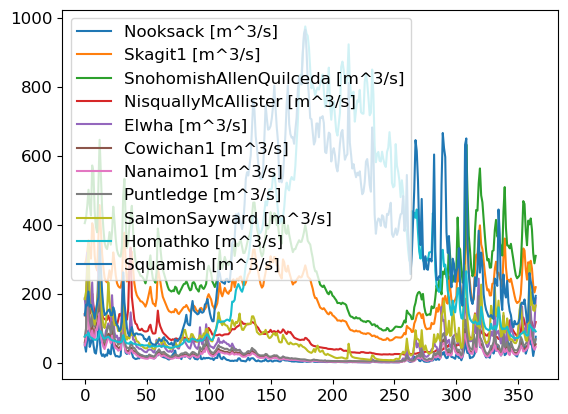

In [395]:
river_dict = {'Nooksack': 'Nooksack [m^3/s]', 'Skagit': 'Skagit1 [m^3/s]', 'Snohomish': 'SnohomishAllenQuilceda [m^3/s]', 'Nisqually': 'NisquallyMcAllister [m^3/s]', 'Elwha': 'Elwha [m^3/s]', 'Cowichan': 'Cowichan1 [m^3/s]', \
              'Nanaimo': 'Nanaimo1 [m^3/s]', 'Puntledge': 'Puntledge [m^3/s]', 'Salmon': 'SalmonSayward [m^3/s]', 'Homathko': 'Homathko [m^3/s]', 'Squamish': 'Squamish [m^3/s]'}

river_dict_old = {'Nooksack': 'Nooksack [kg/m2/s]', 'Skagit': 'Skagit1 [kg/m2/s]', 'Snohomish': 'SnohomishAllenQuilceda [kg/m2/s]', 'Nisqually': 'NisquallyMcAllister [kg/m2/s]', 'Elwha': 'Elwha [kg/m2/s]', 'Cowichan': 'Cowichan1 [kg/m2/s]', \
              'Nanaimo': 'Nanaimo1 [kg/m2/s]', 'Puntledge': 'Puntledge [kg/m2/s]', 'Salmon': 'SalmonSayward [kg/m2/s]', 'Homathko': 'Homathko [kg/m2/s]', 'Squamish': 'Squamish [kg/m2/s]'}

river_flows_202108 = pd.read_csv('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/river_dailies_to_vol_ts_202108_subset_20190101_20231231.csv')
river_flows_202108 = river_flows_202108.loc[:, river_flows_202108.columns != 'Unnamed: 0']

river_flows_202108['date'] = pd.to_datetime(river_flows_202108['date'])
river_flows_202108 = river_flows_202108[river_flows_202108['date'] != pd.to_datetime('2020-02-29')]
river_flows_202108['month'] = river_flows_202108['date'].dt.month
river_flows_202108['dayofyear'] = river_flows_202108['date'].dt.dayofyear
leap_mess = ((river_flows_202108.date.dt.year == 2020) & (river_flows_202108.date.dt.dayofyear > 60))
# river_flows_202108[leap_mess]['dayofyear'] = river_flows_202108[leap_mess]['dayofyear'] -1
river_flows_202108.loc[leap_mess, 'dayofyear'] -= 1
daily_clim_202108 = river_flows_202108.groupby(['dayofyear']).mean(numeric_only=True).reset_index()

daily_clim_202108.loc[:, (daily_clim_202108.columns != 'dayofyear') & (daily_clim_202108.columns != 'month')].plot()

Text(0.5, 0, 'Day of Year')

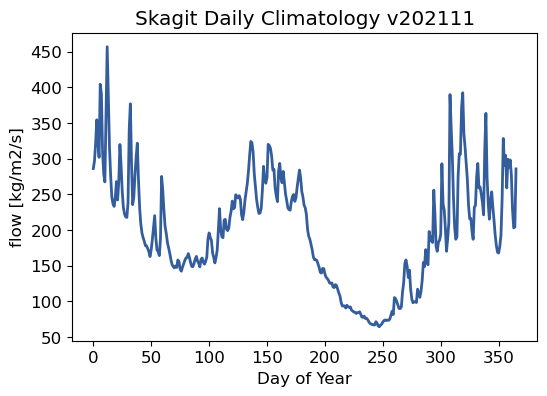

In [291]:
skagflow = daily_clim_202108.loc[:, (daily_clim_202108.columns != 'dayofyear') & (daily_clim_202108.columns != 'month')][river_dict['Skagit']].values
days = np.arange(len(skagflow))

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.plot(days, skagflow, color=color3, linewidth=2)
ax.set_title('Skagit Daily Climatology v202111')
ax.set_ylabel('flow [kg/m2/s]')
ax.set_xlabel('Day of Year')

<AxesSubplot: >

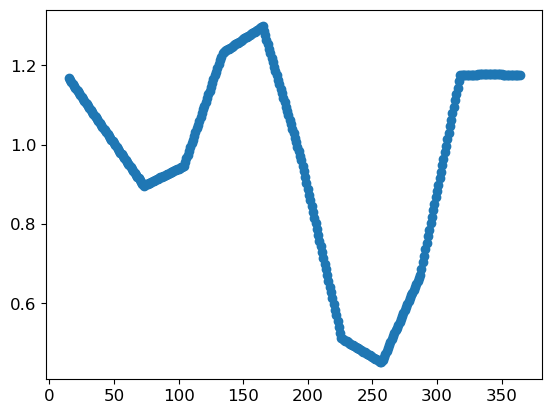

In [408]:
river_flows_201702[pd.to_datetime(river_flows_201702['date']).dt.year == 2013]['Skagit1 [kg/m2/s]'].plot(marker='o')
# river_flows_201702[pd.to_datetime(river_flows_201702['date']).dt.year == 2014]['Skagit1 [kg/m2/s]'].plot()
# river_flows_201702[pd.to_datetime(river_flows_201702['date']).dt.year == 2015]['Skagit1 [kg/m2/s]'].plot()
# river_flows_201702[pd.to_datetime(river_flows_201702['date']).dt.year == 2016]['Skagit1 [kg/m2/s]'].plot()
# river_flows_201702[pd.to_datetime(river_flows_201702['date']).dt.year == 2017]['Skagit1 [kg/m2/s]'].plot()
# river_flows_201702[pd.to_datetime(river_flows_201702['date']).dt.year == 2018]['Skagit1 [kg/m2/s]'].plot()
# river_flows_201702[pd.to_datetime(river_flows_201702['date']).dt.year == 2019]['Skagit1 [kg/m2/s]'].plot()

<AxesSubplot: >

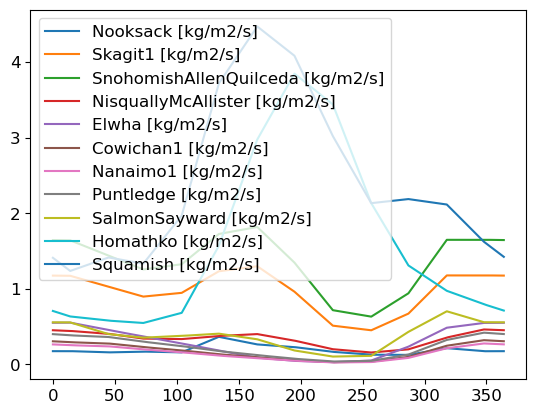

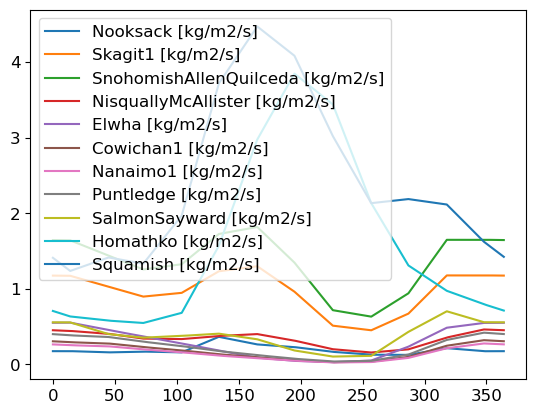

In [ ]:
river_flows_201702 = pd.read_csv('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/river_dailies_to_ts_subset_201702_20130101_20201231.csv')
river_flows_201702 = river_flows_201702.loc[:, river_flows_201702.columns != 'Unnamed: 0']

river_flows_201702['date'] = pd.to_datetime(river_flows_201702['date'])
river_flows_201702 = river_flows_201702[river_flows_201702['date'].dt.year == 2013]
river_flows_201702['date'] = river_flows_201702['date'] - pd.DateOffset(days=0)
river_flows_201702['month'] = river_flows_201702['date'].dt.month
river_flows_201702['dayofyear'] = river_flows_201702['date'].dt.dayofyear
daily_clim_201702 = river_flows_201702.groupby(['dayofyear']).mean(numeric_only=True).reset_index()

daily_clim_201702.loc[:, (daily_clim_201702.columns != 'dayofyear') & (daily_clim_201702.columns != 'month')].plot()
river_flows_201702.loc[:, (river_flows_201702.columns != 'Unnamed: 0') & (river_flows_201702.columns != 'date') & (river_flows_201702.columns != 'month') & (river_flows_201702.columns != 'dayofyear')].plot()

In [294]:
season_dict = {'spring': [3, 4, 5], 'summer': [6, 7, 8], 'fall': [9, 10, 11], 'winter': [12, 1, 2]}

In [295]:
results_201905R, results_202111 = make_results_model('results_0_10_fall_noferry.csv', 'results_0_10_winter_noferry.csv', 'results_0_10_spring_noferry.csv', 'results_0_10_summer_noferry.csv')
# results_model_bar = results_201905R[['season', 'rmse', 'crmse', 'swillmott', 'systematic', 'nonsystematic', 'spread']]
results_model_bar = results_201905R[['season', 'rmse', 'crmse', 'systematic', 'nonsystematic']]  # remove both swmillmott and spread to put on other axes
categories = results_model_bar.loc[:, results_model_bar.columns != 'season'].columns.to_list()

In [296]:
# temp1 = pd.read_csv('temp1_save_top10.csv')
# temp2 = pd.read_csv('temp2_save_top10.csv')

## make the plots

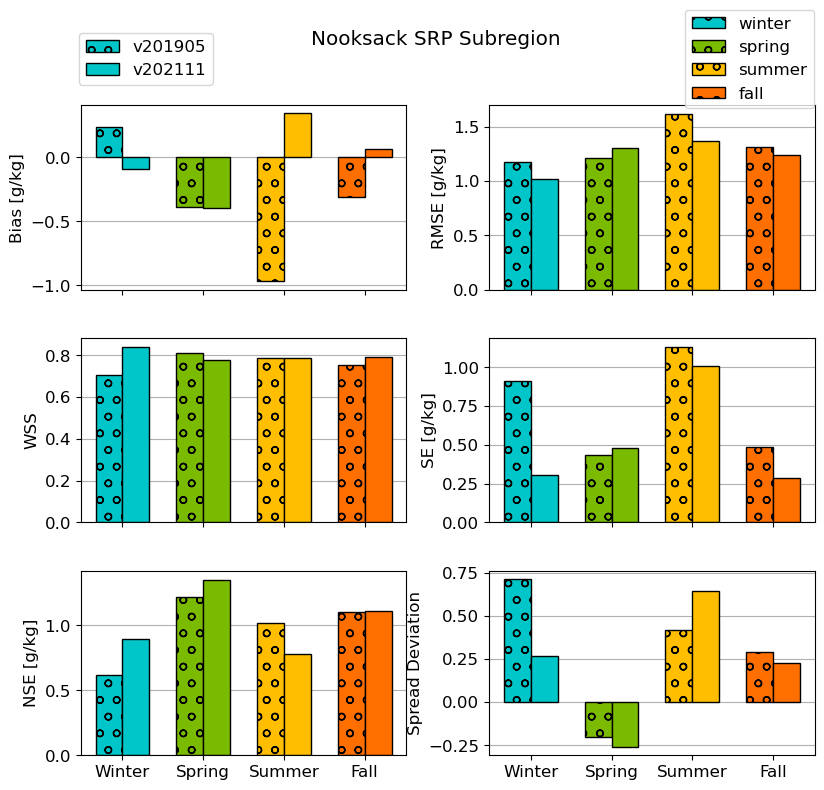

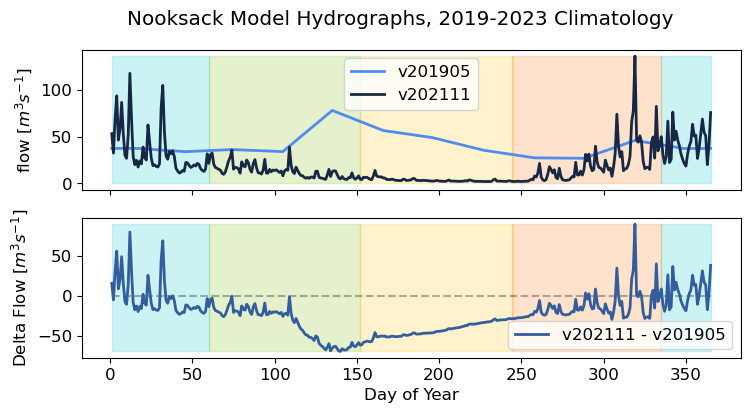

In [428]:
bar_chart(results_201905R, results_202111, categories, 'Nooksack')
# regressions_and_ts(results_201905R, results_202111, 'Nooksack')
hydrograph_and_season('Nooksack')

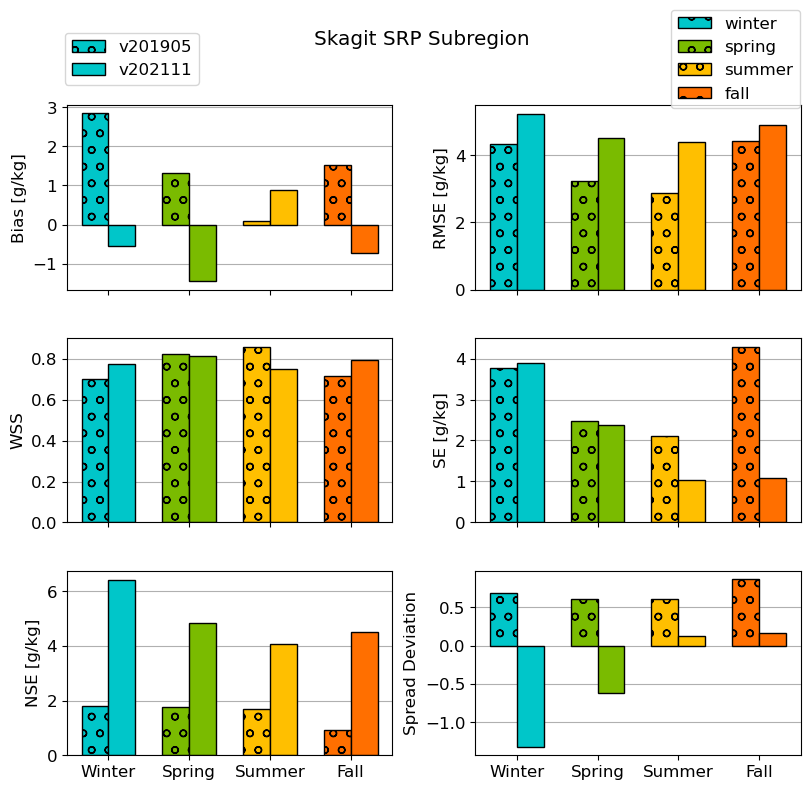

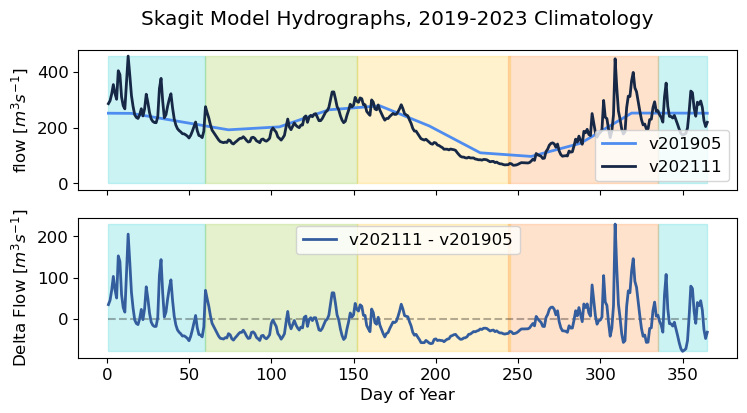

In [429]:
bar_chart(results_201905R, results_202111, categories, 'Skagit')
hydrograph_and_season('Skagit')
# regressions_and_ts(results_201905R, results_202111, 'Skagit')
# single_bar_chart(results_201905R, results_202111, categories, 'Skagit', 'rmse', ' g/kg')
# single_bar_chart(results_201905R, results_202111, categories, 'Skagit', 'bias', ' g/kg')

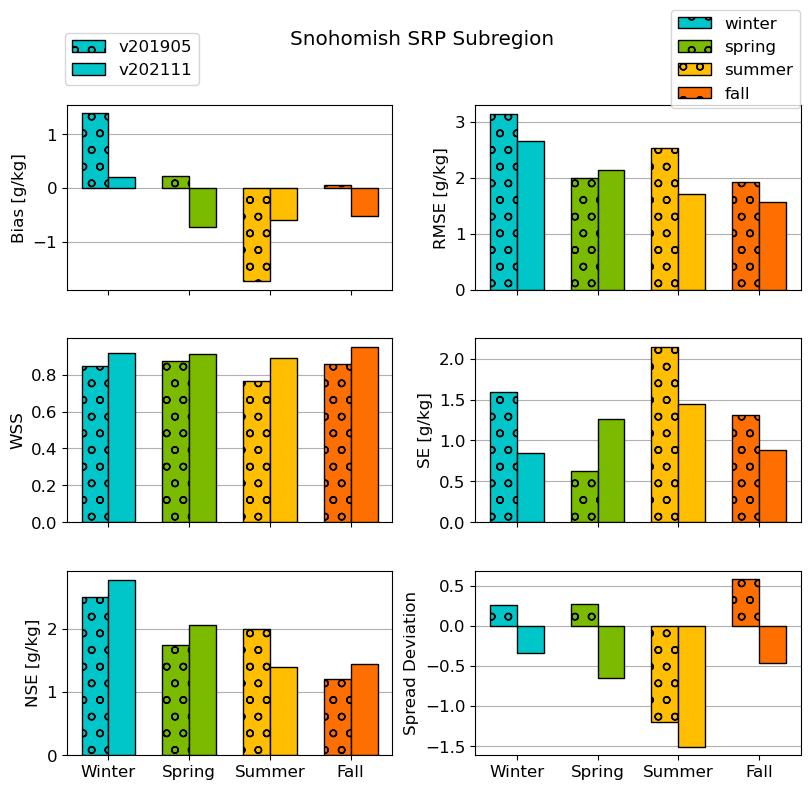

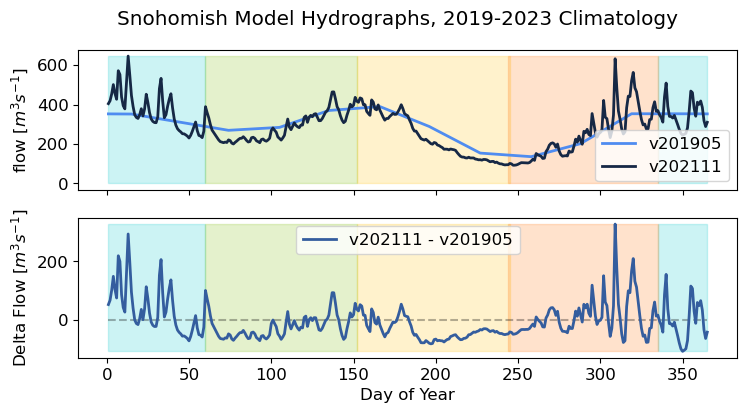

In [430]:
bar_chart(results_201905R, results_202111, categories, 'Snohomish')
hydrograph_and_season('Snohomish')
# regressions_and_ts(results_201905R, results_202111, 'Snohomish')

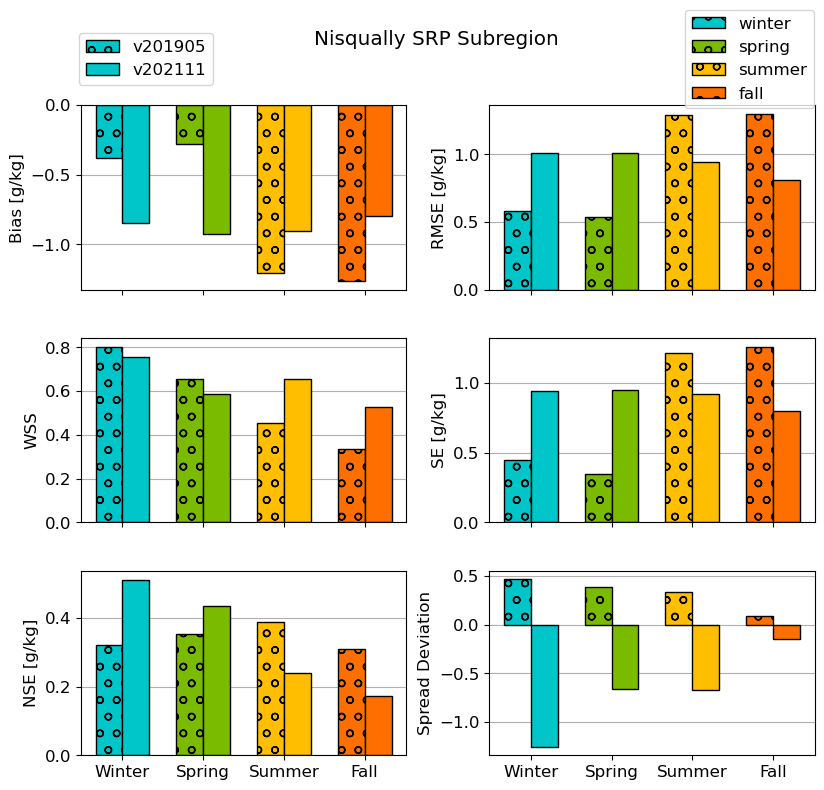

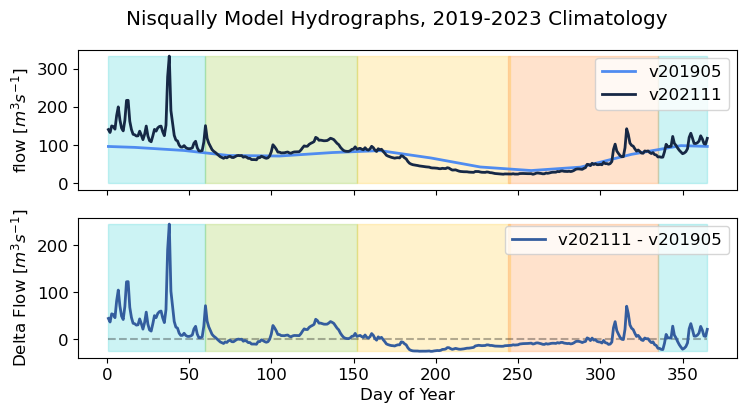

In [431]:
bar_chart(results_201905R, results_202111, categories, 'Nisqually')
hydrograph_and_season('Nisqually')
# regressions_and_ts(results_201905R, results_202111, 'Nisqually')

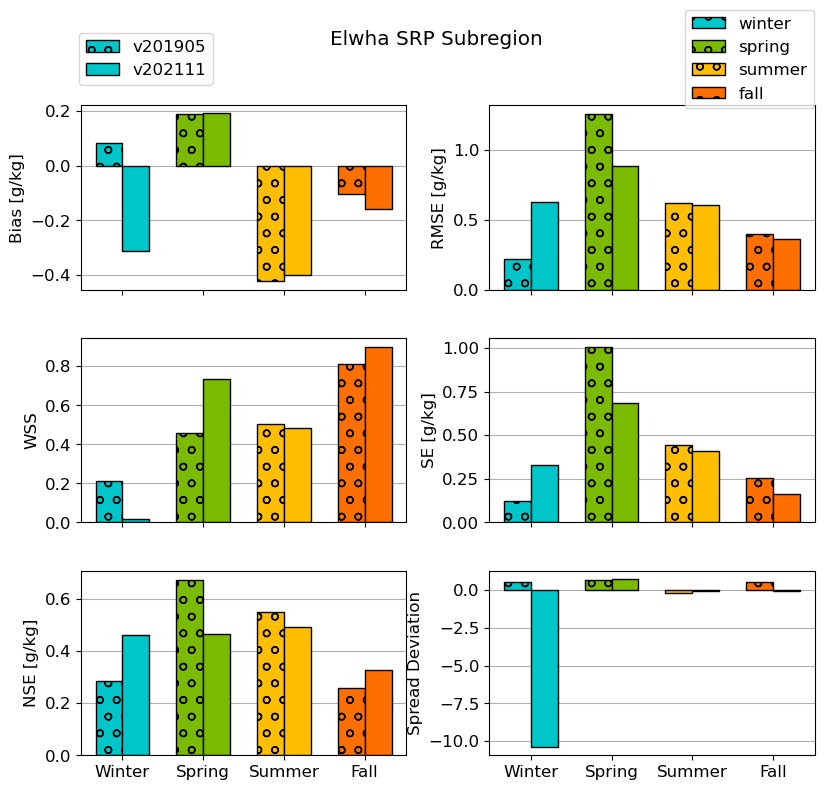

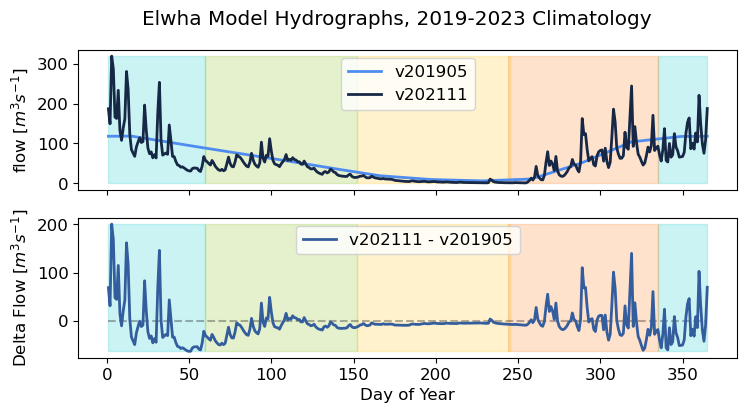

In [432]:
bar_chart(results_201905R, results_202111, categories, 'Elwha')
hydrograph_and_season('Elwha')
# regressions_and_ts(results_201905R, results_202111, 'Elwha')

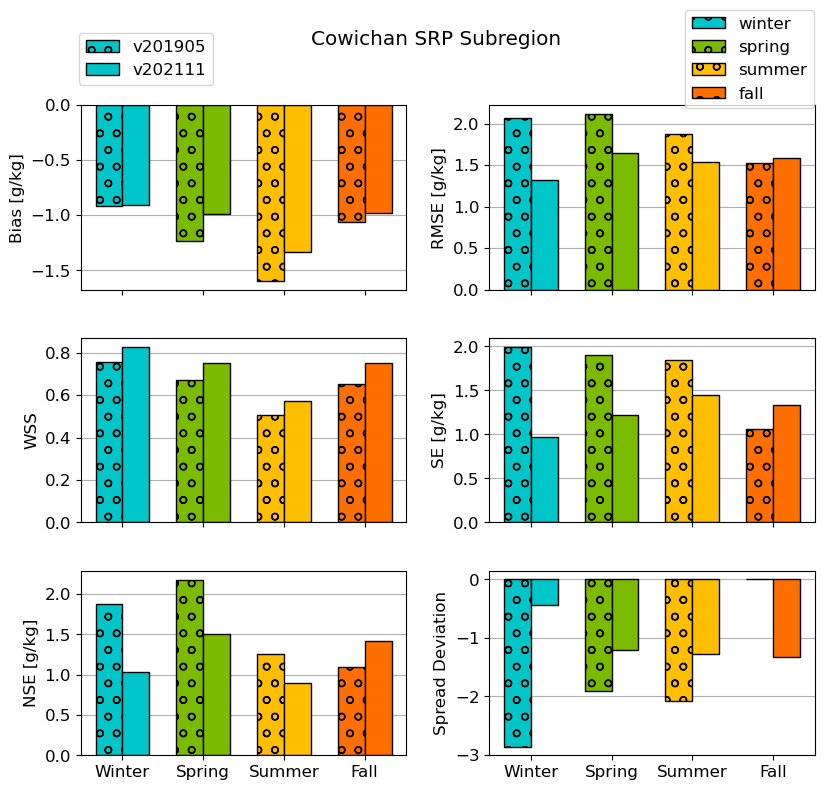

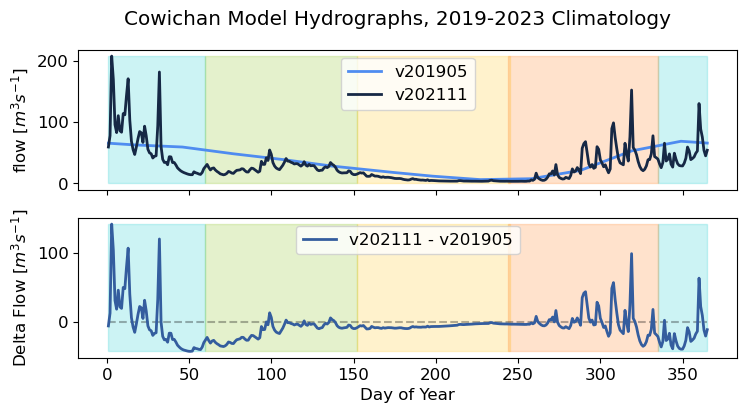

In [433]:
bar_chart(results_201905R, results_202111, categories, 'Cowichan')
hydrograph_and_season('Cowichan')
# regressions_and_ts(results_201905R, results_202111, 'Cowichan')

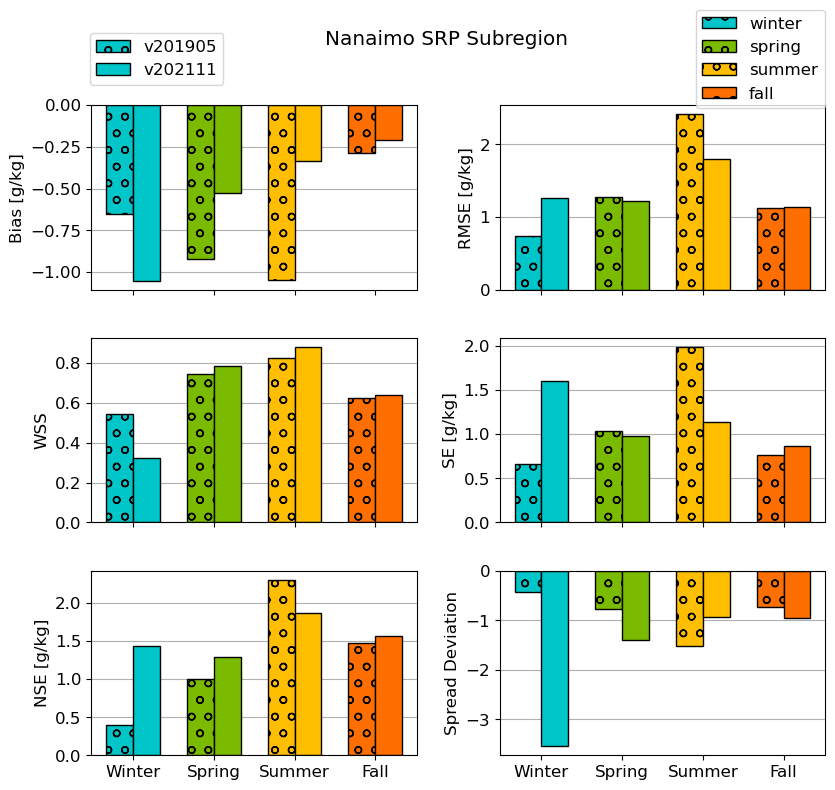

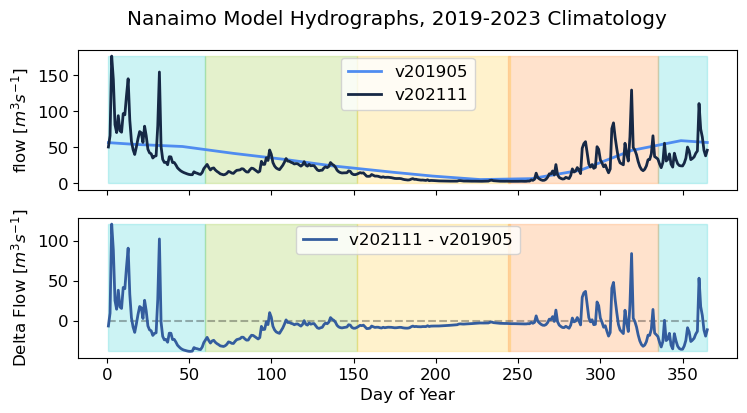

In [434]:
bar_chart(results_201905R, results_202111, categories, 'Nanaimo')
hydrograph_and_season('Nanaimo')
# regressions_and_ts(results_201905R, results_202111, 'Nanaimo')

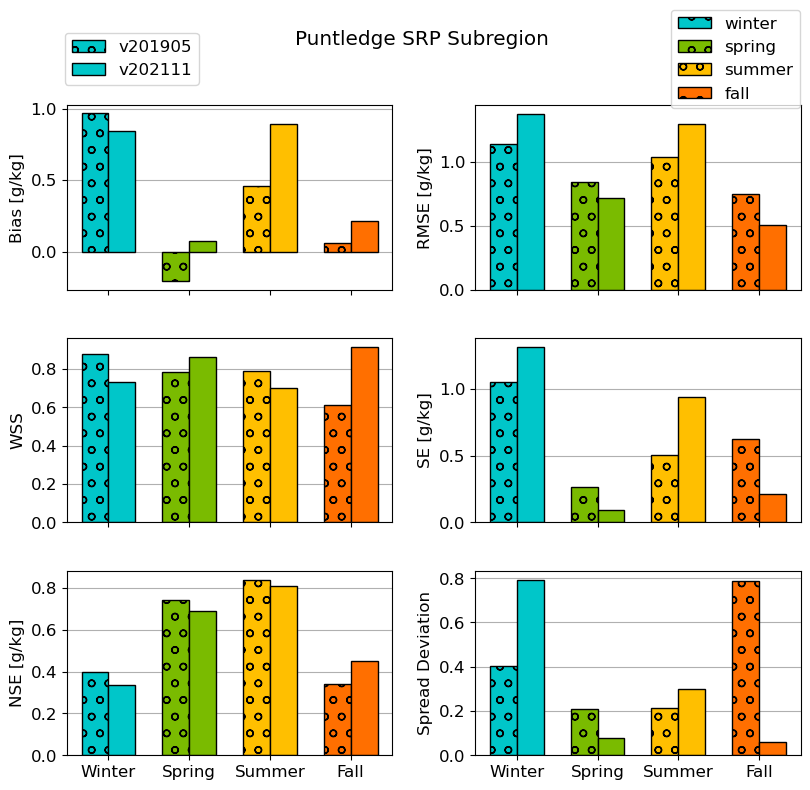

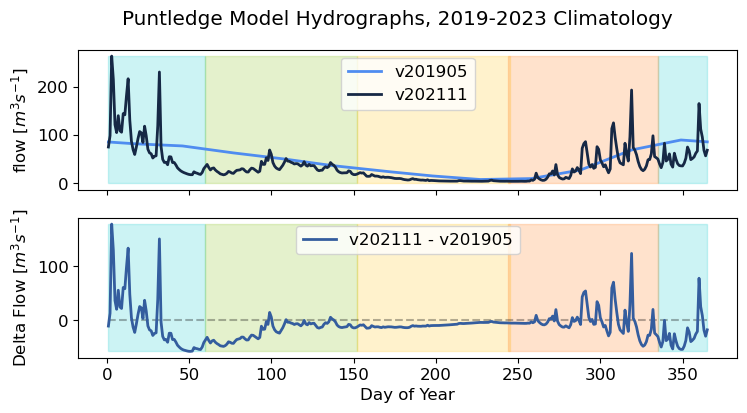

In [435]:
bar_chart(results_201905R, results_202111, categories, 'Puntledge')
hydrograph_and_season('Puntledge')
# regressions_and_ts(results_201905R, results_202111, 'Puntledge')

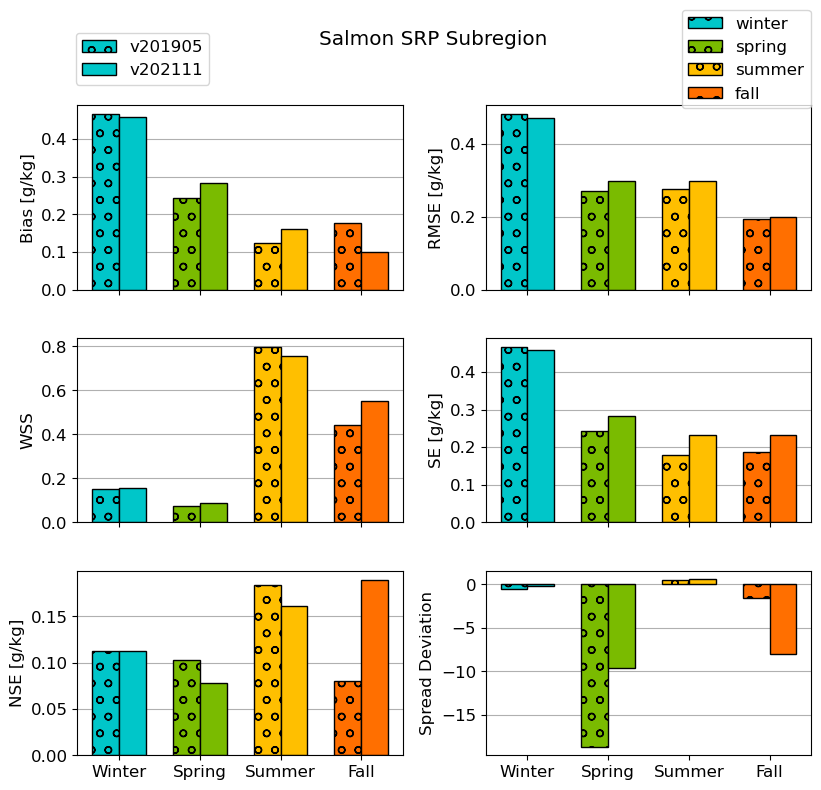

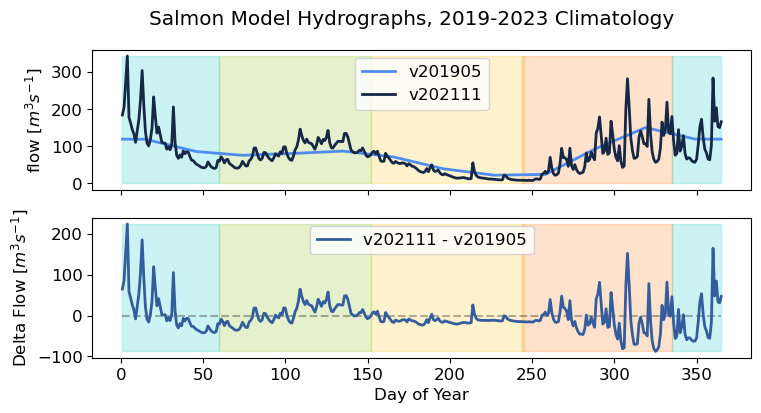

In [436]:
bar_chart(results_201905R, results_202111, categories, 'Salmon')
hydrograph_and_season('Salmon')
# regressions_and_ts(results_201905R, results_202111, 'Salmon')

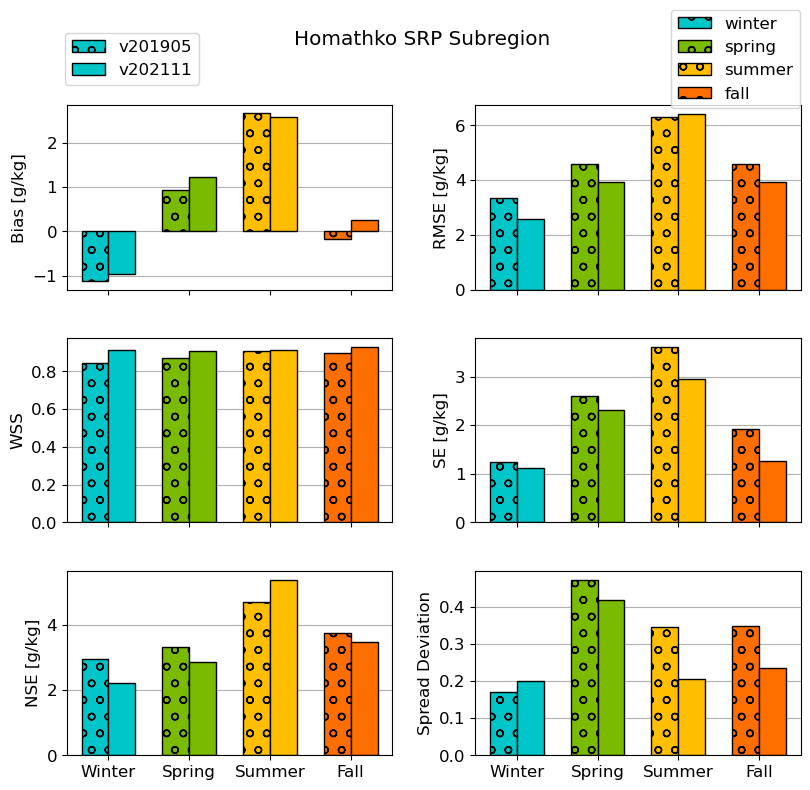

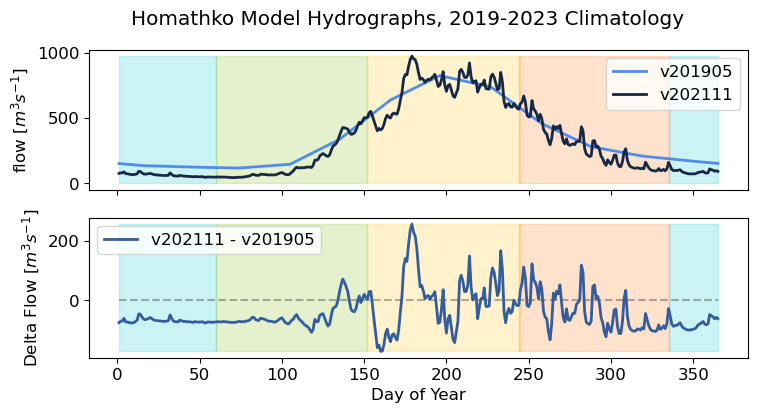

In [437]:
bar_chart(results_201905R, results_202111, categories, 'Homathko')
hydrograph_and_season('Homathko')
# regressions_and_ts(results_201905R, results_202111, 'Homathko')

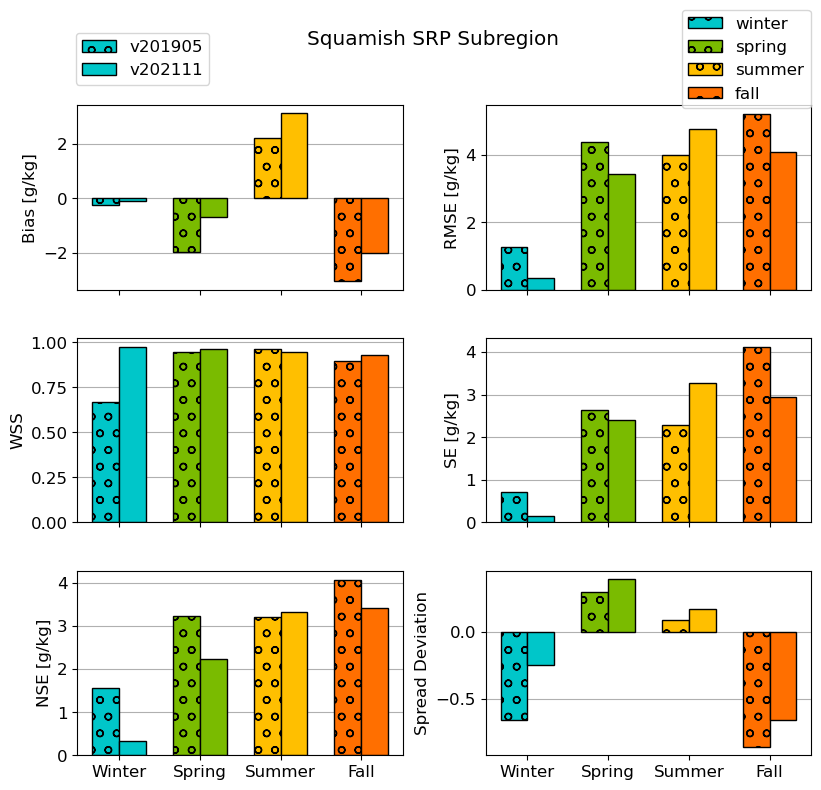

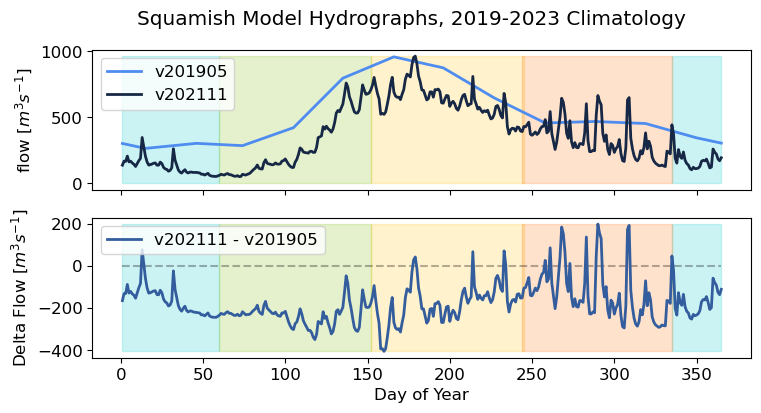

In [438]:
bar_chart(results_201905R, results_202111, categories, 'Squamish')
hydrograph_and_season('Squamish')
# regressions_and_ts(results_201905R, results_202111, 'Squamish')

In [439]:
results_202111

,model,number,bias,rmse,crmse,swillmott,slopedev,const,systematic,nonsystematic,spread,region,season
11,202111,108,0.066712,1.238026,1.236227,0.207014,0.180331,5.278283,0.287279,1.110082,0.227408,Nooksack,fall
12,202111,169,-0.718882,4.906991,4.854047,0.204406,0.132112,2.732535,1.072787,4.502854,0.168216,Skagit,fall
13,202111,204,-0.516805,1.556629,1.468334,0.049115,-0.224984,-6.707613,0.889083,1.447157,-0.462267,Snohomish,fall
14,202111,1248,-0.796327,0.813698,0.167235,0.471620,-0.078342,-3.138537,0.796823,0.171696,-0.146631,Nisqually,fall
15,202111,227,-0.159655,0.360125,0.322801,0.100059,-0.037810,-1.365106,0.161099,0.328346,-0.064710,Elwha,fall
16,202111,1209,-0.979805,1.586619,1.247935,0.248893,-0.719669,-22.300961,1.329223,1.415613,-1.321003,Cowichan,fall
17,202111,114,-0.212151,1.133728,1.113702,0.362293,-0.968505,-27.557902,0.866951,1.565270,-0.956892,Nanaimo,fall
18,202111,110,0.213809,0.507803,0.460597,0.083375,0.035164,1.220323,0.216138,0.451642,0.060077,Puntledge,fall
19,202111,27,0.098502,0.199633,0.173639,0.450096,-2.840449,-88.727284,0.231825,0.189864,-7.983671,Salmon,fall
20,202111,516,0.245815,3.943825,3.936157,0.070085,0.152587,3.858644,1.270032,3.480940,0.235108,Homathko,fall
